Epoch 1/50
32000/32000 [==============================] - 115s 4ms/step - loss: 0.6082 - accuracy: 0.6632 - val_loss: 0.5876 - val_accuracy: 0.6858
Epoch 2/50
32000/32000 [==============================] - 81s 3ms/step - loss: 0.5784 - accuracy: 0.6926 - val_loss: 0.5716 - val_accuracy: 0.7012
Epoch 3/50
32000/32000 [==============================] - 84s 3ms/step - loss: 0.5674 - accuracy: 0.7018 - val_loss: 0.5636 - val_accuracy: 0.7062
Epoch 4/50
32000/32000 [==============================] - 95s 3ms/step - loss: 0.5595 - accuracy: 0.7091 - val_loss: 0.5613 - val_accuracy: 0.7115
Epoch 5/50
32000/32000 [==============================] - 85s 3ms/step - loss: 0.5536 - accuracy: 0.7140 - val_loss: 0.5575 - val_accuracy: 0.7119
Epoch 6/50
32000/32000 [==============================] - 83s 3ms/step - loss: 0.5486 - accuracy: 0.7182 - val_loss: 0.5457 - val_accuracy: 0.7207
Epoch 7/50
32000/32000 [==============================] - 130s 4ms/step - loss: 0.5444 - accuracy: 0.7212 - val_loss:

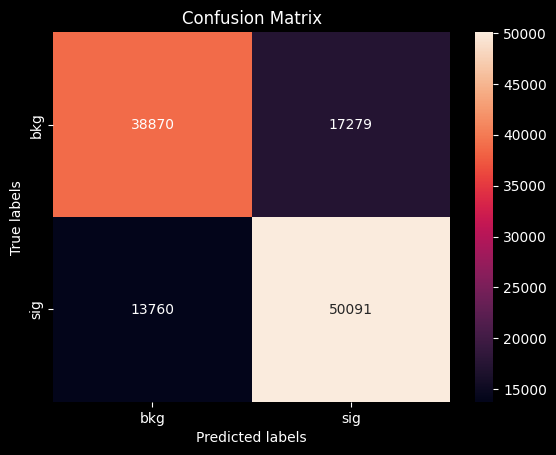

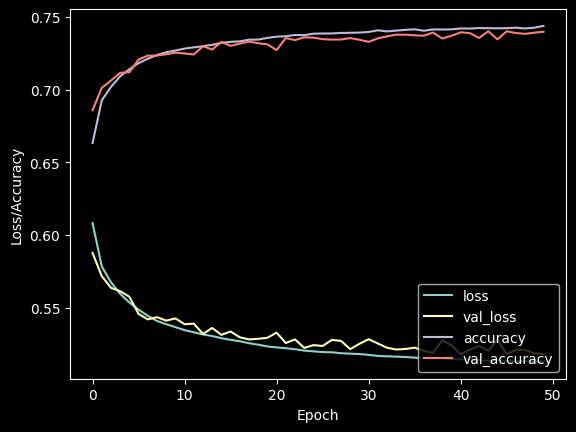

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# load data
data = pd.read_csv("HIGGS_train.csv", header=None)
X = data.drop(columns=[0])  # drop target column
y = data[0]

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# build model architecture
model = keras.Sequential([
    keras.layers.Dense(70, activation='relu', input_shape=(28,)),
    keras.layers.Dense(43, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# compile model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
# define early stopping callback
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# train model
history = model.fit(X_train, y_train, epochs=50,
                    batch_size=12, validation_split=0.2)

# evaluate model on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Accuracy:', test_acc)

# print recall, percision, f-1 score, confusion matrix
y_pred = model.predict(X_test)
y_pred = [1 if y >= 0.5 else 0 for y in y_pred]
print('Recall:', recall_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))

# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['bkg', 'sig'])
ax.yaxis.set_ticklabels(['bkg', 'sig'])
plt.show()

# plot loss and accuracy
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss/Accuracy')
plt.legend(loc='lower right')
plt.show()


18750/18750 [==============================] - 33s 2ms/step
Accuracy:  0.7446837234186171
F1-score:  0.7655498877405316
Confusion matrix:  [[196704  85724]
 [ 67465 250104]]
Recall:  0.7875579795257094
Precision:  0.7447383779792036


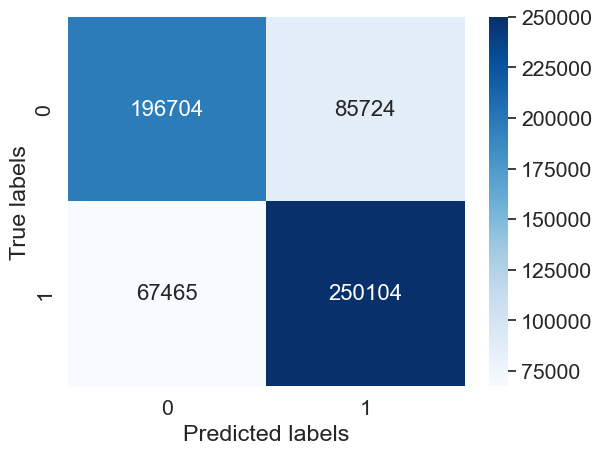

In [7]:
import pickle
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# save the model .h5
model.save("FAM_best_model.h5")

# save the model using pickle
pickle.dump(model, open("FAM_model_one.pkl", "wb"))

# load the model using pickle
FAM_model_one = pickle.load(open("FAM_model_one.pkl", "rb"))

# make predictions on "HIGGS_train.csv"
data = pd.read_csv("HIGGS_train.csv", header=None).dropna()
X = data.drop(columns=[0])  # drop target column
y = data[0]

# make predictions
predictions = FAM_model_one.predict(X)

# print accuracy, F1-score, confusion matrix, recall, percision
print("Accuracy: ", accuracy_score(y, predictions.round()))
print("F1-score: ", f1_score(y, predictions.round()))
print("Confusion matrix: ", confusion_matrix(y, predictions.round()))
print("Recall: ", recall_score(y, predictions.round()))
print("Precision: ", precision_score(y, predictions.round()))

# plot confusion matrix
sns.set(font_scale=1.4)
cm = confusion_matrix(y, predictions.round())
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


343750/343750 [==============================] - 746s 2ms/step
Accuracy:  0.7416663636363636
F1-score:  0.7629833008099539
Confusion matrix:  [[3584503 1586374]
 [1255296 4573827]]
Recall:  0.7846509672209696
Precision:  0.7424801560858161


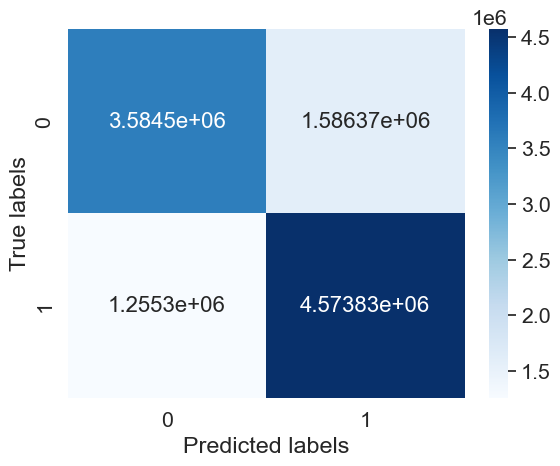

In [6]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# make predictions on "HIGGS_train.csv"
data = pd.read_csv("HIGGS.csv", header=None).dropna()
X = data.drop(columns=[0])  # drop target column
y = data[0]

# make predictions
predictions = FAM_model_one.predict(X)

# print accuracy, F1-score, confusion matrix, recall, percision
print("Accuracy: ", accuracy_score(y, predictions.round()))
print("F1-score: ", f1_score(y, predictions.round()))
print("Confusion matrix: ", confusion_matrix(y, predictions.round()))
print("Recall: ", recall_score(y, predictions.round()))
print("Precision: ", precision_score(y, predictions.round()))

# plot confusion matrix
sns.set(font_scale=1.4)
cm = confusion_matrix(y, predictions.round())
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

